# Zomato Data Analysis

## Import all required libraries

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.cluster import KMeans

## Load the dataset

In [2]:
df = pd.read_csv(r"C:\Users\hp\Downloads\My Project\Zomato Project\zomato.csv",encoding='latin1')

In [3]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [4]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [5]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

In [6]:
df.columns

Index(['restaurant_id', 'restaurant_name', 'country_code', 'city', 'address',
       'locality', 'locality_verbose', 'longitude', 'latitude', 'cuisines',
       'average_cost_for_two', 'currency', 'has_table_booking',
       'has_online_delivery', 'is_delivering_now', 'switch_to_order_menu',
       'price_range', 'aggregate_rating', 'rating_color', 'rating_text',
       'votes'],
      dtype='object')

In [7]:
df.shape

(9551, 21)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   restaurant_id         9551 non-null   int64  
 1   restaurant_name       9551 non-null   object 
 2   country_code          9551 non-null   int64  
 3   city                  9551 non-null   object 
 4   address               9551 non-null   object 
 5   locality              9551 non-null   object 
 6   locality_verbose      9551 non-null   object 
 7   longitude             9551 non-null   float64
 8   latitude              9551 non-null   float64
 9   cuisines              9542 non-null   object 
 10  average_cost_for_two  9551 non-null   int64  
 11  currency              9551 non-null   object 
 12  has_table_booking     9551 non-null   object 
 13  has_online_delivery   9551 non-null   object 
 14  is_delivering_now     9551 non-null   object 
 15  switch_to_order_menu 

In [9]:
df.isnull().sum()

restaurant_id           0
restaurant_name         0
country_code            0
city                    0
address                 0
locality                0
locality_verbose        0
longitude               0
latitude                0
cuisines                9
average_cost_for_two    0
currency                0
has_table_booking       0
has_online_delivery     0
is_delivering_now       0
switch_to_order_menu    0
price_range             0
aggregate_rating        0
rating_color            0
rating_text             0
votes                   0
dtype: int64

In [10]:
df=df.dropna(subset=['cuisines'])

In [11]:
df.isnull().sum()

restaurant_id           0
restaurant_name         0
country_code            0
city                    0
address                 0
locality                0
locality_verbose        0
longitude               0
latitude                0
cuisines                0
average_cost_for_two    0
currency                0
has_table_booking       0
has_online_delivery     0
is_delivering_now       0
switch_to_order_menu    0
price_range             0
aggregate_rating        0
rating_color            0
rating_text             0
votes                   0
dtype: int64

In [12]:
# drop duplicates
df = df.drop_duplicates(subset=['restaurant_name','city'], keep='first')

In [13]:
# convert numeric
df['aggregate_rating'] = pd.to_numeric(df['aggregate_rating'], errors='coerce')
df['votes'] = pd.to_numeric(df['votes'], errors='coerce')
df['average_cost_for_two'] = df['average_cost_for_two'].astype(str).str.replace(',', '')
df['average_cost_for_two'] = pd.to_numeric(df['average_cost_for_two'], errors='coerce')

In [14]:
# flags
df['has_table_booking_flag'] = df['has_table_booking'].astype(str).str.lower().map({'yes':1,'no':0})
df['has_online_delivery_flag'] = df['has_online_delivery'].astype(str).str.lower().map({'yes':1,'no':0})
df['is_delivering_now_flag'] = df['is_delivering_now'].astype(str).str.lower().map({'yes':1,'no':0})

In [15]:
# feature engineering
df['main_cuisine'] = df['cuisines'].astype(str).str.split(',').str[0].str.strip()
df['cuisine_count'] = df['cuisines'].astype(str).str.split(',').apply(lambda x: len([i for i in x if i.strip()!='']))
df['price_per_person'] = df['average_cost_for_two']/2
df['rating_category'] = df['aggregate_rating'].apply(lambda x: 'excellent' if x>=4 else ('good' if x>=3.5 else ('average' if x>=3 else 'poor')))

## Checking Outliers:

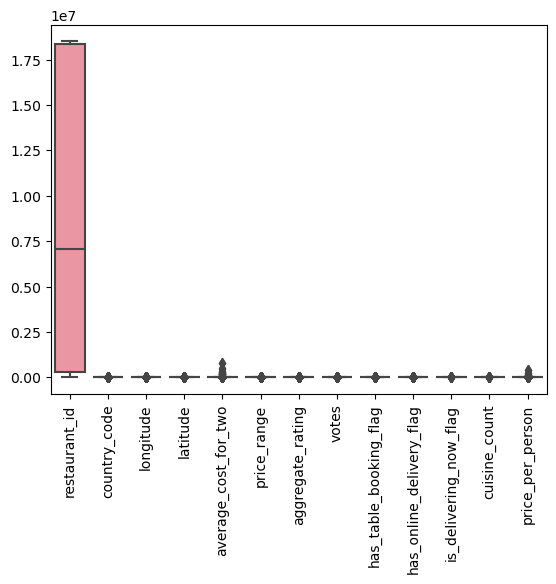

In [16]:
sns.boxplot(df)
plt.xticks(rotation=90)
plt.show()

In [17]:
numeric_cols = ['average_cost_for_two','price_range','aggregate_rating','votes']
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col]=np.where(df[col] > upper, upper, df[col])
    df[col]=np.where(df[col]< lower, lower, df[col])

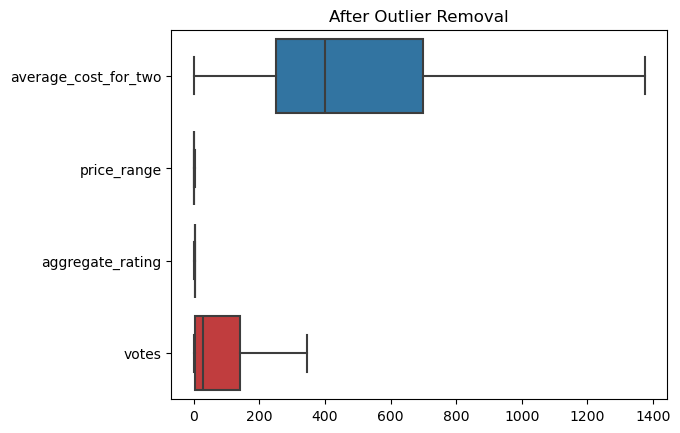

In [18]:
sns.boxplot(data=df[numeric_cols], orient='h')
plt.title("After Outlier Removal")
plt.show()

In [19]:
df.columns

Index(['restaurant_id', 'restaurant_name', 'country_code', 'city', 'address',
       'locality', 'locality_verbose', 'longitude', 'latitude', 'cuisines',
       'average_cost_for_two', 'currency', 'has_table_booking',
       'has_online_delivery', 'is_delivering_now', 'switch_to_order_menu',
       'price_range', 'aggregate_rating', 'rating_color', 'rating_text',
       'votes', 'has_table_booking_flag', 'has_online_delivery_flag',
       'is_delivering_now_flag', 'main_cuisine', 'cuisine_count',
       'price_per_person', 'rating_category'],
      dtype='object')

In [20]:
df.head(2)

,restaurant_id,restaurant_name,country_code,city,address,locality,locality_verbose,longitude,latitude,cuisines,...,rating_color,rating_text,votes,has_table_booking_flag,has_online_delivery_flag,is_delivering_now_flag,main_cuisine,cuisine_count,price_per_person,rating_category
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Dark Green,Excellent,314.0,1,0,0,French,3,550.0,excellent
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Dark Green,Excellent,344.0,1,0,0,Japanese,1,600.0,excellent


## Exploratory Data Analysis (EDA):

In [21]:
# top cities
df['city'].value_counts().head(10)

city
New Delhi       4295
Gurgaon          943
Noida            902
Faridabad        235
Ghaziabad         25
Ahmedabad         21
Bhubaneshwar      21
Amritsar          21
Guwahati          21
Lucknow           21
Name: count, dtype: int64

In [22]:
# top cuisines
df['main_cuisine'].value_counts().head(10)

main_cuisine
North Indian    2680
Chinese          757
Bakery           537
Fast Food        518
Cafe             440
Continental      226
Street Food      210
American         206
South Indian     202
Mithai           196
Name: count, dtype: int64

In [23]:
# High-value restaurants
df[['restaurant_name','city','aggregate_rating','votes']].sort_values(['aggregate_rating','votes'], ascending=[False,False]).head(10)

,restaurant_name,city,aggregate_rating,votes
3,Ooma,Mandaluyong City,4.9,344.0
8,Spiral - Sofitel Philippine Plaza Manila,Pasay City,4.9,344.0
10,Silantro Fil-Mex,Pasig City,4.9,344.0
124,Rae's Coastal Cafe,Augusta,4.9,344.0
175,Shorts Burger and Shine,Cedar Rapids/Iowa City,4.9,344.0
235,Tantra Asian Bistro,Davenport,4.9,344.0
250,The Cafe,Des Moines,4.9,344.0
304,Atlanta Highway Seafood Market,Gainesville,4.9,344.0
324,Ingleside Village Pizza,Macon,4.9,344.0
362,Pom Pom's Teahouse and Sandwicheria,Orlando,4.9,344.0


C:\Users\hp\Downloads\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


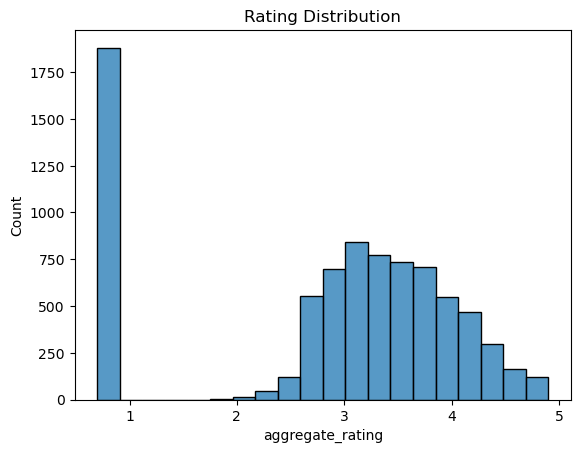

In [24]:
# plots
sns.histplot(df['aggregate_rating'].dropna(), bins=20)
plt.title("Rating Distribution")
plt.show()

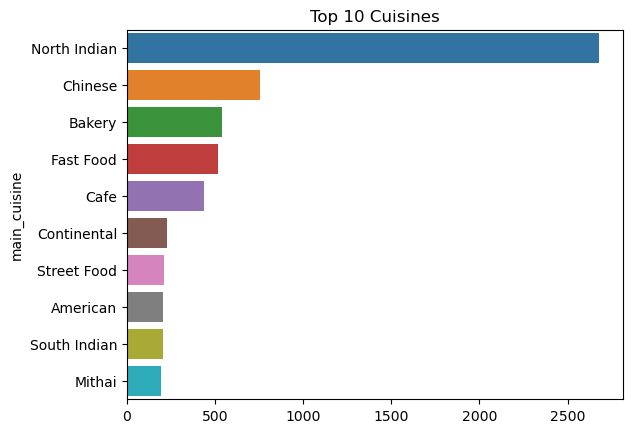

In [25]:
sns.barplot(x=df['main_cuisine'].value_counts().head(10).values,
            y=df['main_cuisine'].value_counts().head(10).index)
plt.title("Top 10 Cuisines")
plt.show()

C:\Users\hp\Downloads\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


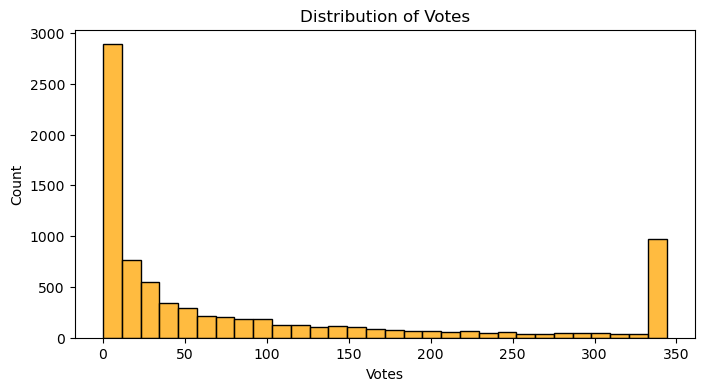

In [26]:
# Votes distribution
plt.figure(figsize=(8,4))
sns.histplot(df['votes'].dropna(), bins=30, kde=False, color='orange')
plt.title("Distribution of Votes")
plt.xlabel("Votes")
plt.ylabel("Count")
plt.show()

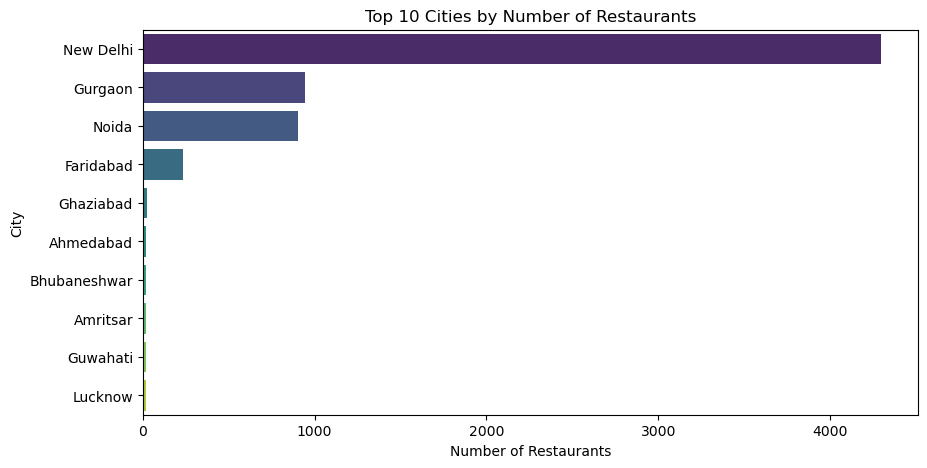

In [27]:
# Top 10 cities by restaurant count
plt.figure(figsize=(10,5))
top_cities = df['city'].value_counts().head(10)
sns.barplot(x=top_cities.values, y=top_cities.index, palette='viridis')
plt.title("Top 10 Cities by Number of Restaurants")
plt.xlabel("Number of Restaurants")
plt.ylabel("City")
plt.show()

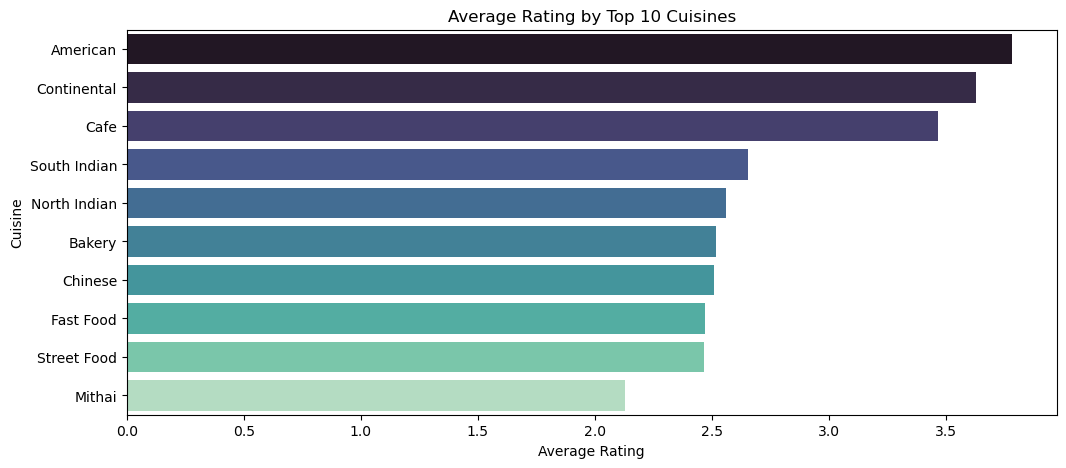

In [28]:
# Average rating by cuisine (top 10 cuisines only)
plt.figure(figsize=(12,5))
top_cuisines = df['main_cuisine'].value_counts().head(10).index
cuisine_rating = df[df['main_cuisine'].isin(top_cuisines)].groupby('main_cuisine')['aggregate_rating'].mean().sort_values(ascending=False)
sns.barplot(x=cuisine_rating.values, y=cuisine_rating.index, palette='mako')
plt.title("Average Rating by Top 10 Cuisines")
plt.xlabel("Average Rating")
plt.ylabel("Cuisine")
plt.show()

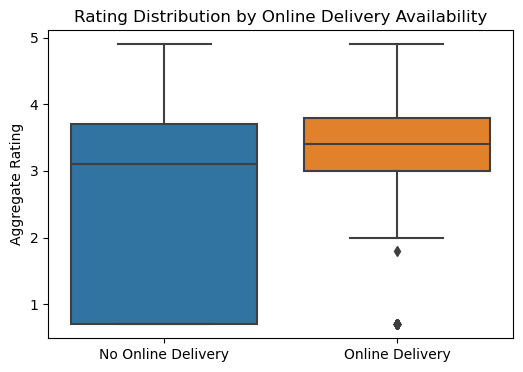

In [29]:
# Online delivery vs rating
plt.figure(figsize=(6,4))
sns.boxplot(x='has_online_delivery_flag', y='aggregate_rating', data=df)
plt.xticks([0,1], ['No Online Delivery','Online Delivery'])
plt.title("Rating Distribution by Online Delivery Availability")
plt.xlabel("")
plt.ylabel("Aggregate Rating")
plt.show()

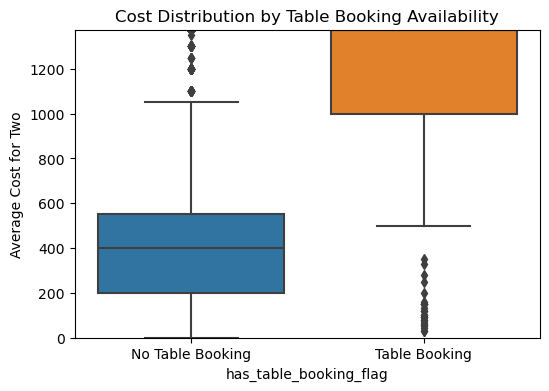

In [30]:
# Table booking vs average cost
plt.figure(figsize=(6,4))
sns.boxplot(x='has_table_booking_flag', y='average_cost_for_two', data=df)
plt.xticks([0,1], ['No Table Booking','Table Booking'])
plt.ylim(0, df['average_cost_for_two'].quantile(0.95))  # cap extreme outliers
plt.title("Cost Distribution by Table Booking Availability")
plt.ylabel("Average Cost for Two")
plt.show()

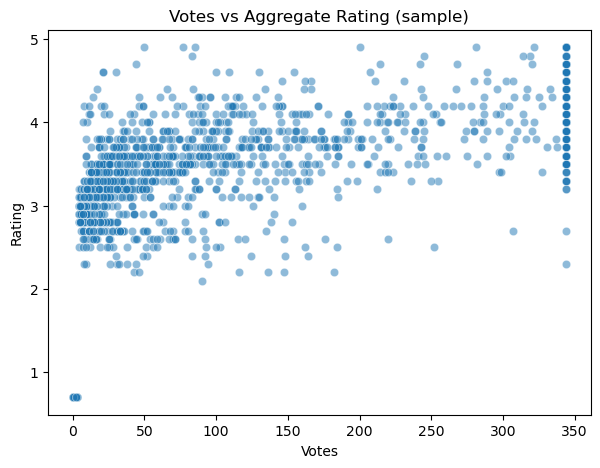

In [31]:
# Votes vs Rating scatter (sample)
sample_votes = df[['votes','aggregate_rating']].dropna().sample(min(2000, df.shape[0]), random_state=42)
plt.figure(figsize=(7,5))
sns.scatterplot(x='votes', y='aggregate_rating', data=sample_votes, alpha=0.5)
plt.title("Votes vs Aggregate Rating (sample)")
plt.xlabel("Votes")
plt.ylabel("Rating")
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_11288\1527662990.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='price_range', y='aggregate_rating', data=df, ci=None, palette='coolwarm')


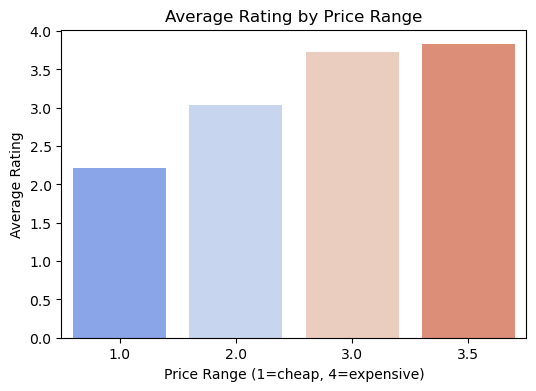

In [32]:
# Price Range vs Average Rating
plt.figure(figsize=(6,4))
sns.barplot(x='price_range', y='aggregate_rating', data=df, ci=None, palette='coolwarm')
plt.title("Average Rating by Price Range")
plt.xlabel("Price Range (1=cheap, 4=expensive)")
plt.ylabel("Average Rating")
plt.show()

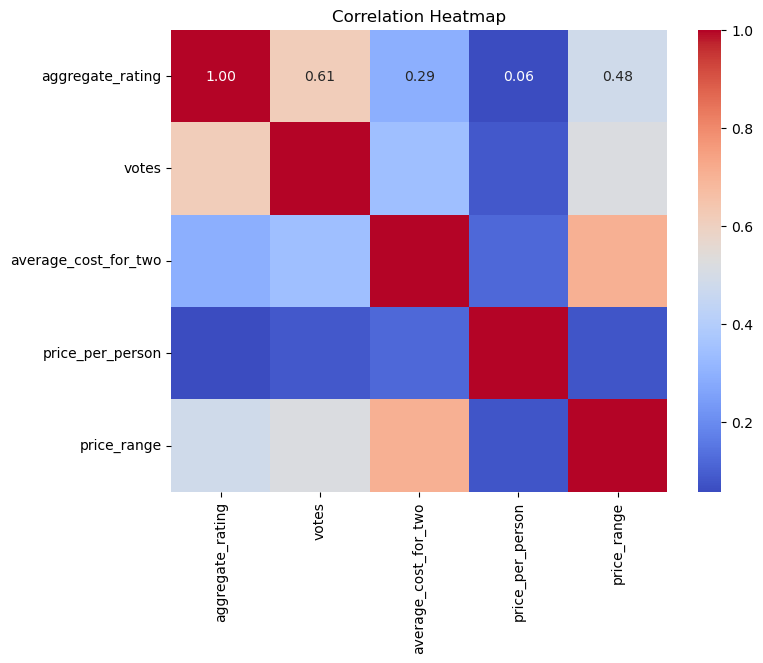

In [33]:
# Heatmap of numeric correlations
plt.figure(figsize=(8,6))
sns.heatmap(df[['aggregate_rating','votes','average_cost_for_two','price_per_person','price_range']].corr(),
            annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [35]:
df['high_rating'] = df['aggregate_rating'].apply(lambda x: 1 if x>=4 else 0)

In [37]:
features = ['votes','price_per_person','has_online_delivery_flag','has_table_booking_flag','is_delivering_now_flag','price_range','cuisine_count']
model_df = df[['high_rating']+features].dropna()

In [38]:
X = model_df[features]
y = model_df['high_rating']

In [41]:
X = model_df[features].copy()

In [42]:
scaler = StandardScaler()
X[['votes','price_per_person']] = scaler.fit_transform(X[['votes','price_per_person']])

In [43]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

## Model Training:

In [44]:
lr = LogisticRegression(max_iter=300)
lr.fit(X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,300
,multi_class,'deprecated'


In [45]:
preds = lr.predict(X_test)

In [46]:
print("Accuracy:", accuracy_score(y_test,preds))
print(classification_report(y_test,preds))

Accuracy: 0.8700564971751412
              precision    recall  f1-score   support

           0       0.91      0.94      0.92      1334
           1       0.62      0.53      0.57       259

    accuracy                           0.87      1593
   macro avg       0.76      0.73      0.75      1593
weighted avg       0.86      0.87      0.87      1593



## Clustering:

In [47]:
cluster_df = df[['aggregate_rating','votes','price_per_person']].dropna()
scaler2 = StandardScaler()
scaled = scaler2.fit_transform(cluster_df)

In [48]:
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(scaled)
cluster_df['cluster'] = labels
cluster_df['cluster'].value_counts()

cluster
0    4372
1    1881
2    1712
Name: count, dtype: int64

## Save the Dataset:

In [49]:
df.to_csv(r"C:\Users\hp\Downloads\zomato_clean.csv", index=False)